<a href="https://colab.research.google.com/github/duonghb53/AI-Foundation-Course/blob/main/7_GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Genetic Algorithm - Giải thuật di truyền**
Từ lâu, chúng ta thường được nghe rằng loài người được tiến hóa từ loài vượn cổ. Quan điểm này xuất phát từ thuyết tiến hóa của Charles Darwin. Song song với thuyết tiến hóa của Darwin - quan điểm chọn lọc tự nhiên thì còn 1 thuyết tiến hóa nữa của Jean-Baptiste Lamarck. Tuy nhiên trong bài viết này mình sẽ không đề cập tới lĩnh vực này mà mình muốn giới thiệu tới bạn đọc một thuật toán sử dụng chọn lọc tự nhiên để giải quyết bài toán có không gian tìm kiếm rất lớn - **Genetic Algorithm - Giải thuật Di Truyền.**

1. Ý tưởng chính
- Mối liên hệ giữa các thành phần

2. Thuật toán di truyền
- Initial Population- Khởi tạo quần thể
- Evaluation - Đánh giá
- Selection - Chọn lọc
- Crossover - Sinh sản
- Mutation - Đột biến
3. Những vấn đề thường gặp khi sử dụng thuật toán
- Evaluation
- Chromosome
4. Ứng dụng thực tiễn

## **1. Ý tưởng chính**
Nhằm giải thích sự xuất hiện của Hươu cao cổ, Darwin đưa ra giả thiết rằng: “Trong quần thể Hươu vốn đã tồn tại những con Hươu có cổ cao hơn bình thường nhờ gen di truyền và sự đột biến. Trải qua quá trình sinh sống và phát triển, môi trường thay đổi khiến cho thức ăn càng ngày càng khó kiếm hơn, khiến những con Hươu có chiếc cổ cao sẽ chiếm ưu thế sinh tồn hơn. Lâu dần thì thế hệ Hươu mới sẽ được thay bằng những con Hươu cao cổ có khả năng sinh sản và thích nghi với môi trường lớn hơn”.
![](https://i.imgur.com/NdOXCr4.jpg)

Nhìn vào thuyết tiến hóa của Hươu cao cổ này, chúng ta thấy được sự xuất hiện của những thành phần sau:
- Quần thể
- Đột biến
- Sinh sản
- Chọn lọc tự nhiên
đây cũng chính là những thành phần trong giải thuật này.

**Mối liên hệ giữa các thành phần**

Để nắm rõ ý tưởng chính của thuật toán, biểu đồ dưới đây sẽ mổ tả cụ thể những thành phần và mối liên hệ của chúng.
![](https://i.imgur.com/Y8XKIDK.png)

- **1. Population - Quần thể:** Một quần thể ban đầu sẽ có những cá thể nhất định với những đặc tính khác nhau, những đặc tính này sẽ quy định khả năng sinh sản, sinh tồn, khả năng đáp ứng điều kiện môi trường của từng cá thể.
- **2. Natural Selection - Chọn lọc tự nhiên:** Theo thời gian những cá thể yếu hơn, không có khả năng sinh tồn sẽ bị loại bỏ bởi những tác nhân như tranh chấp chuỗi thức ăn, môi trường tác độc, bị loài khác tiêu diệt, … Cuối cùng sẽ còn lại những cá thể có đặc tính ưu việt hơn sẽ được giữ lại - Adaptive individual.
- **3. Mutation - Đột biến:** Như chúng ta đã biết thì mỗi cá thể con được sinh ra sẽ được kế thừa lại những đặc tính của cả cha và mẹ. Sau một thời gian sinh sống, một quần thể sẽ đặt tới giới hạn của các cặp gen của con được tạo nên từ gen của bố mẹ. Để đạt được tới sự tiến hóa, Đột Biến chính là một trong những nguyên nhân chính, có vai trò đóng góp nguyên liệu cho quá trình Chọn lọc tự nhiên.
- **4. Evolution - Tiến hóa:** Những cá thể đột biến không phải luôn là những cá thể mạnh mẽ và có đủ khả năng sinh tồn, Chọn lọc tự nhiên sẽ chọn ra những cá thể đột biến nhưng có thể thích nghi với môi trường sống tốt hơn những cá thể khác trong quần thể. Sau một thời gian sinh sản, những gen đột biến sẽ chiếm ưu thế và chiếm đa số trong quần thể.


## **2. Thuật toán di truyền**
Có rất nhiều cách giải thích và biểu đồ khác nhau để diễn giải thuật toán, nhưng nhìn chung các thành phần chính của thuật toán sẽ không thay đổi.
GA bao gồm 3 bước chính là **Selection (chọn lọc)**, **Crossover (lai ghép)** và **Mutation (đột biến)** được mô tả ở hình vẽ sau:
![](https://i.imgur.com/yhsnUg6.png)

trong đó
- **Selection**: chọn lọc những cá thể có fitness (hay score) tốt để lai ghép và đột biến
- **Crossover**: Trao đổi gen giữa hai cá thể
- **Mutation**: đột biến gen của một cá thể

Ngoài ra còn có bước **population initialization (khởi tạo quần thể)** nhằm tạo ngẫu nhiên quần thể ban đầu. Bước **evaluation** có mục đích để tính giá trị fitness cho các cá thể. GA không quan tâm đến cách thức tính fitness cho một cá thể, mà chỉ cần biết thông tin input và output. Ba bước chính của GA sẽ được lặp đi lặp lại cho đến khi nào điều kiện dừng được thỏa mãn. Điều kiện dừng có thể là số lần lặp (generation), tính bão hòa của giá trị max_fitness, hay sự hội tự của quần thể (các cá thế có fitness gần giống nhau).

Sau đây chúng ta sẽ đi vào chi tiết từng bước và minh họa bằng bài toán **one-max**.



### **Population initialization**

Ở bước này, dựa vào thông tin số cá thể m và số gen của một cá thể n, quần thể gồm m cá thể được khởi tạo với các giá trị ngẫu nhiên. Hình sau minh họa giá trị khởi tạo một quần thể với m = 10 và n = 6.

![](https://i.imgur.com/QWLEdLh.png)

**Source code cho bước này như sau:** 


In [ ]:
import random
n = 6                 # size of individual (chromosome)
m = 10                # size of population

def generate_random_value():
    return random.randint(0, 1)

def create_individual():
    return [generate_random_value() for _ in range(n)]

population = [create_individual() for _ in range(m)]

#print population
for pol in population:
  print(pol)

[0, 0, 1, 0, 0, 1]
[1, 0, 1, 1, 1, 1]
[1, 0, 0, 1, 0, 1]
[1, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 0, 0]
[0, 1, 0, 1, 1, 1]
[0, 0, 1, 1, 0, 1]
[0, 0, 1, 0, 0, 0]
[1, 0, 1, 1, 0, 0]
[0, 0, 0, 1, 1, 0]


### **Evaluation**

Ở bước này, GA sử dụng một hàm được cung cấp sẵn để tính fitness cho từng cá thể. Với bài one-max, hàm cung cấp sẵn chính là hàm secret(), nhận input là một cá thể và output là giá trị fitness của cá thể đó. GA không biết nội dung bên trong của hàm secret() mà chỉ biết chuẩn input và giá trị output. Minh họa bước tính fitness cho quần thể ở hình sau:

![](https://i.imgur.com/qTUH4Yy.png)

**Source code cho bước này như sau:** 

In [ ]:
def compute_fitness(individual):
    return sum(gen for gen in individual)

#print population
for pol in population:
  print(compute_fitness(pol))

2
4
2
2
4
4
1
4
5
2


### **Selection**

Dựa vào giá trị fitness của mỗi cá thể, bước selection sẽ chọn ra một tập hợp các cá thể có fitness tốt nhất. Nguyên tắc chọn là cá thể nào có fitness càng cao thì khả năng cá thể đó sẽ được chọn càng nhiều lần. Có nhiều phương pháp selection trong GA, và ở bài này chúng ta sẽ áp dụng phương pháp binary selection. Binary selection hoạt động như sau: lấy ngẫu nhiên hai cá thể trong quần thể, cá thể nào có fitness tốt hơn thì được chọn.

Nói cách khác, giả sử các cá thể trong quần thể được đánh giá trị index (từ 0 đến 9 cho 10 cá thể). Để chọn ra được một cá thể tốt, chúng ta sẽ sinh ra hai số ngẫu nhiên 𝑖1 và 𝑖2 nằm trong đoạn [0, 9]. Sau đó, lấy hai cá thể vị trí index 𝑖1 và 𝑖2, cá thể nào có fitness cao hơn sẽ được chọn.

Binary selection có thể cài bằng với hai bước: 1) sắp xếp các cá thể theo thứ tự tăng dần với tiêu chí fitness; 2) Sinh ra hai số ngẫu nhiên 𝑖1,𝑖2∈[0,𝑚−1], rồi chọn cá thể có giá trị index lớn hơn. Hình sau minh họa binary selection.

![](https://i.imgur.com/XZSjIOn.png)

Ví dụ minh họa trên muốn chọn ra hai cá thể tự quần thể hiện tại. Ban đầu, quần thể được sắp xếp theo tứ tự tăng đần của fitness. Sau đó, hai cặp số ngẫu nhiên được sinh ra. Cặp số đầu tiên là (9, 4), nghĩa là giữa hai cá thể ở vị trí index 9 và 4, chọn cá thể tốt hơn. Do quần thể đã được sắp xếp, vị trí index lớn hơn sẽ được chọn. Cuối cùng, cá thể có index 9 được chọn. Tương tự cho cặp số ngẫu nhiên thứ 2 (5, 2), cá thể vị trí index 5 được chọn.

Trong trường hợp chúng ta muốn lựa chọn những cá thể tốt từ quần thể hiện tại để tạo ra một quần thể mới, m cặp số ngẫu nhiên sẽ được sinh ra nhằm chọn ra được m cá thể cho quần thể mới. Hình sau mình họa quá trình tạo quần thể mới.

![](https://i.imgur.com/KvMYa6N.png)

Chúng ta thấy được rằng ở quần thể mới, những cá thể tốt nhất ở quần thể cũ được giữ lại và những cá thể có fitness nhỏ được loại bỏ. Điều này có ý nghĩa rằng qua quá trình tiến hóa, chúng ta mong muốn những cá thể tốt với nhiều gen tốt sẽ được giữ lại và lan tỏa ra quần thể.

**Source code cho bước này như sau:**


In [ ]:
def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)    
    while True:
        index2 = random.randint(0, m-1)    
        if (index2 != index1):
            break
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s

### **Crossover**

Crossover nhắm lai ghép giữa hai cá thế. Cụ thể, hai cá thể có thể trao đổi gen với nhau. Trong bài này, chúng ta sẽ dùng binary crossover để thực hiện việc lai tạo giữa hai cá thể. Binary crossover hoạt động như sau: cho trước xác suất thực hiện crossover cho một gen là 𝑅𝑐𝑟=0.9, sinh ra một boolean vector 𝑣𝑐𝑟 có độ dài n, trong đó mỗi phần tử chứa giá trị True hoặc False. Giá trị True cho một vị trí index nghĩa là thực hiện việc trao đổi gen ở vị trí đó giữa hai cá thể. Ví dụ cho 𝑅𝑐𝑟=0.9 nghĩa là việc trao đổi gen cho một vị trí giữa hai cá thể là 90% khả năng. Hình sau minh họa việc trao đổi gen cho trước vector 𝑣𝑐𝑟.

![](https://i.imgur.com/x9tjQ0O.png)

**Source code cho bước này như sau:**


In [ ]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

### **Mutation**

Mutation nhằm đột biến gen cho một cá thể. Gen cần đột biến sẽ nhận một giá trị ngẫn nhiên nằm trong miền giá trị. Tương tự crossover, mutation cũng cần một boolean vector 𝑣𝑚𝑡 để xác định những gen nào cần đột biến. Vector 𝑣𝑚𝑡 được sinh ra một cách ngẫu nhiên theo một khả năng mutation 𝑅𝑚𝑡 cho trước. Hình sau minh họa việc đột biến cho một cá thể dựa vào vector 𝑣𝑚𝑡 cho trước.

![](https://i.imgur.com/EswpR2w.png)

**Source code cho bước này như sau:**


In [ ]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m

## **Source đầy đủ bài toán One-max**

[[1, 1, 0, 1, 0, 1], [0, 0, 1, 1, 1, 0], [1, 0, 1, 0, 1, 0], [1, 1, 1, 0, 1, 1], [0, 0, 1, 0, 0, 0], [1, 1, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0], [1, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1], [1, 1, 1, 0, 1, 0]]


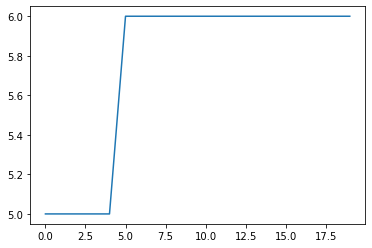

In [ ]:
# Chương trình cài đặt với mục đích dễ hiểu
# Nhiều chỗ có thể cải tiến về mặt computation và memory
import random
import matplotlib.pyplot as plt

n = 6                 # size of individual (chromosome)
m = 10                # size of population
n_generations = 20    # number of generations
# để vẽ biểu đồ quá trình tối ưu
fitnesses = []
def generate_random_value():
    return random.randint(0, 1)

def create_individual():
    return [generate_random_value() for _ in range(n)]

def secret(individual):
    return sum(gen for gen in individual)

def compute_fitness(individual):
    return secret(individual)

def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = generate_random_value()
        
    return individual_m
def selection(sorted_old_population):    
    index1 = random.randint(0, m-1)    
    while True:
        index2 = random.randint(0, m-1)    
        if (index2 != index1):
            break
            
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    
    return individual_s 
def create_new_population(old_population, elitism=2, gen=1):
    sorted_population = sorted(old_population, key=compute_fitness)
        
    if gen%1 == 0:
        fitnesses.append(compute_fitness(sorted_population[m-1]))
        #print("BEST:", compute_fitness(sorted_population[m-1]))      
    
    new_population = []
    while len(new_population) < m-elitism:
        # selection
        individual_s1 = selection(sorted_population)
        individual_s2 = selection(sorted_population) # duplication
        
        # crossover
        individual_c1, individual_c2 = crossover(individual_s1, individual_s2)
        
        # mutation
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
        
        new_population.append(individual_m1)
        new_population.append(individual_m2)            
    
    for ind in sorted_population[m-elitism:]:
        new_population.append(ind.copy())
    
    return new_population
population = [create_individual() for _ in range(m)]
print(population)
for i in range(n_generations):
    population = create_new_population(population, 2, i)

# Vẽ biểu đồ
plt.plot(fitnesses)
plt.show()

## **3. Những vấn đề thường gặp khi sử dụng thuật toán**
Thông thường, GA sẽ đạt được lợi thế trong những bài toán có không gian tìm kiếm quá lớn mà những giải thuật vét cạn không thể xử lí được. Tuy nhiên khi sử dụng, chúng ta sẽ cần cân nhắc những vấn đề ảnh hưởng tới việc lựa chọn thuật toán.

> ### **Evaluation**

Vấn đề đầu tiên gặp phải đó chính là việc đánh giá các cá thể trong quần thể, chúng ta cần một phương thức để có thể đánh giá sự thích nghi hay ưu thế của từng cá thể.

Tuy nhiên khi thực hiện việc này, chúng ta sẽ cần cân nhắc 2 vấn đề:
- **Tính khả thi:** Việc tìm phương thức đánh giá không phải luôn khả thi, ví dụ trong bài toàn tìm một giai điệu mới, việc đánh giá giai điệu đó có “dễ nghe”, “hay” hay không thuộc về cảm quan của mỗi người, nên việc tìm một hàm đánh giá chính xác sẽ rất khó khăn. 
- **Chi phí:** Đây cũng là một vấn đề cần cân nhắc, nếu chi phí tính toán của phương thức đánh giá quá lớn, việc sử dụng để tìm kiếm trong không gian sẽ mất nhiều thời gian, thậm chí lâu hơn vét cạn.


> ### **Chromosome**

Việc số hóa những đặc tính của bài toán thành các bits, bytes để có thể sử dụng trong khâu **Crossover**, **Mutation** cũng gặp nhiều khó khăn trong những bài toán khác nhau. Bởi với mỗi sự thay đổi bit sẽ phải tương ứng với việc tạo ra một cá thể với đặc tính khác nhau.


## **4. Ứng dụng thực tiễn**
Như đã đề cập trước đó, Genetic Algorithm sẽ có ưu thế trong những bài toán mà có sẵn lời giải trong một không gian tìm kiếm lớn như những bài toán cổ điển One-max, Travelling, MinSphere, Knapsack, Advertising … Ngoài ra, hiện nay với việc bùng nổ của AI, rất nhiều bài toán dùng GA để tăng accuracy nhưng với kiến thức hiện tại mình chỉ đưa ra ứng dụng với 1 số bài toán trên...

Để xây dựng hàm GA chung sử dụng cho các bài toán trên ta cần xây dựng các bước chung Population initialization, Evaluation(có nghĩa là ta cần xây dựng lại các hàm generate_random_value và secret trong source code One-max ở trên)

Các hàm Selection, Crossover, Mutation sử dụng giống nhau nên chỉ cần kế thừa lại source code bài toán One-max




# **Source code GA**

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt


class GA:
    def __init__(self, 
               nSizePopulation,
               rangeGen,
               nInviduals,
               secret,
               nIterators,
               rateCross = 0.9,
               rateMutate = 0.05,
               elitism = 2,
               typeRandom = 0):
        self.nSizePopulation = nSizePopulation
        self.rangeGen = rangeGen
        self.nInviduals = nInviduals
        self.secret = secret
        self.nIterators = nIterators
        self.fitness = []
        self.rateCross = rateCross
        self.rateMutate = rateMutate
        self.elitism = elitism
        self.typeRandom = typeRandom

    def generate_random_value(self):
        if self.typeRandom:
            return np.random.randint(self.rangeGen[0], self.rangeGen[1] + 1)
        return np.random.uniform(self.rangeGen[0],self.rangeGen[1])
        
    def create_individual(self):
        return [self.generate_random_value() for _ in range(self.nInviduals)]

    def compute_fitness(self, individual):
        return self.secret(individual)

    def crossover(self, individual1, individual2):
        individual1_new = individual1.copy()
        individual2_new = individual2.copy()
        
        for i in range(self.nInviduals):
            if random.random() < self.rateCross:
                individual1_new[i] = individual2[i]
                individual2_new[i] = individual1[i]            
        
        return individual1_new, individual2_new

    def mutate(self, individual):
        individual_m = individual.copy()
        
        for i in range(self.nInviduals):
            if random.random() < self.rateMutate:
                individual_m[i] = self.generate_random_value()
            
        return individual_m

    def selection(self, sorted_old_population):    
        index1 = random.randint(0, self.nSizePopulation-1)    
        while True:
            index2 = random.randint(0, self.nSizePopulation-1)    
            if (index2 != index1):
                break
                
        individual_s = sorted_old_population[index1]
        if index2 > index1:
            individual_s = sorted_old_population[index2]
        
        return individual_s 

    def create_new_population(self, old_population):
        sorted_population = sorted(old_population, key=self.compute_fitness) 
        self.fitness.append(1/(self.compute_fitness(sorted_population[self.nSizePopulation-1]) + 1))   
        
        new_population = []

        while len(new_population) < self.nSizePopulation-self.elitism:
            # selection
            individual_s1 = self.selection(sorted_population)
            individual_s2 = self.selection(sorted_population) # duplication
            
            # crossover
            individual_c1, individual_c2 = self.crossover(individual_s1, individual_s2)
            
            # mutation
            individual_m1 = self.mutate(individual_c1)
            individual_m2 = self.mutate(individual_c2)
            
            new_population.append(individual_m1)
            new_population.append(individual_m2)            
        
        for ind in sorted_population[self.nSizePopulation-self.elitism:]:
            new_population.append(ind.copy())

        return new_population

    def runGA(self):
        population = [self.create_individual() for _ in range(self.nSizePopulation)]
        for i in range(self.nIterators):
            population = self.create_new_population(population)

        return population[-1]
    # Quan sát đồ thị
    def showGraph(self):
        if (self.fitness == []):
            print("You don't run GA")
            return

        plt.plot(self.fitness)
        plt.show()

## **Max-one**

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


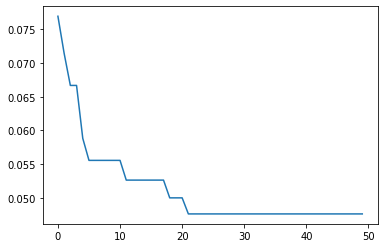

In [ ]:
def secret(individual):
    return sum(gen for gen in individual)
binaryMax = GA(nSizePopulation = 20,
               rangeGen = (0,1),
               nInviduals = 20,
               secret = secret,
               nIterators = 50,
               rateCross = 0.9,
               rateMutate = 0.05,
               elitism = 2,
               typeRandom = 1)

print(binaryMax.runGA())
binaryMax.showGraph()

## **MinShere**


[-0.0007465873336833795, 0.20078271590701036, 0.04929889468842319, 0.024907815964269275]


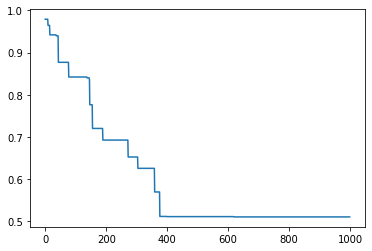

In [ ]:
def secret(individual):
    loss = sum(gen*gen for gen in individual)  
    fitness = 1/(1 + loss)
    return fitness
minShere = GA(nSizePopulation = 10,
               rangeGen = (-20,20),
               nInviduals = 4,
               secret = secret,
               nIterators = 1000,
               rateCross = 0.9,
               rateMutate = 0.05,
               elitism = 2,
               typeRandom = 0)

print(minShere.runGA())
minShere.showGraph()

## **Knapsack**

[1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


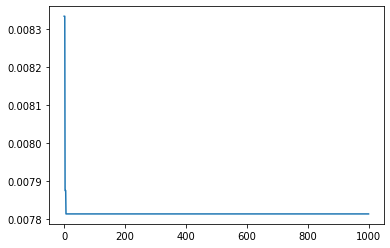

In [ ]:
weights = [1, 2, 5, 7, 1, 12, 15, 1, 32, 33, 5, 37]  # can nang cac vat
prices =  [1, 31, 6, 7, 3, 15, 25, 32, 2, 45, 7, 3]  # gia tri cua cac vat tuong ung

maxWeight = 50

def secret(individual):
    sum_weight = sum(c*x for c, x in zip(individual, weights))
    fitness = sum(c*x for c, x in zip(individual, prices))
    if sum_weight > maxWeight:
        fitness /= 1000               
    return fitness

knapSack = GA(nSizePopulation = 100,
               rangeGen = (0, 1),
               nInviduals = 12,
               secret = secret,
               nIterators = 1000,
               rateCross = 0.9,
               rateMutate = 0.05,
               elitism = 2,
               typeRandom = 1)

print(knapSack.runGA())
knapSack.showGraph()